In [2]:
import pandas as pd
import numpy as np
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV file into a DataFrame
stock_data = pd.read_csv(r'C:\Users\WALTON\Desktop\NayanPython\Capstone Project\Stock_Market_Data.csv')  

# Set attributes using dot notation or bracket notation
stock_data.description = "This DataFrame contains stock market data."
stock_data.source = "Company X"  # Example of another attribute

# Print the DataFrame to see the added attributes
print(stock_data)


             Date        Name    Open    High     Low   Close      Volume
0      02-01-2022     01.Bank   22.83   23.20   22.59   22.93  1842350.41
1      03-01-2022     01.Bank   23.03   23.29   22.74   22.90  1664989.63
2      04-01-2022     01.Bank   22.85   23.13   22.64   22.84  1354510.97
3      05-01-2022     01.Bank   22.91   23.20   22.70   22.98  1564334.81
4      06-01-2022     01.Bank   23.12   23.65   23.00   23.37  2586344.19
...           ...         ...     ...     ...     ...     ...         ...
49153  26-06-2022  ZEALBANGLA  169.00  174.90  169.00  170.30    10480.00
49154  27-06-2022  ZEALBANGLA  174.10  176.00  166.90  167.50    13817.00
49155  28-06-2022  ZEALBANGLA  170.00  170.90  167.00  168.10     5214.00
49156  29-06-2022  ZEALBANGLA  167.10  169.00  164.90  165.10     6678.00
49157  30-06-2022  ZEALBANGLA  165.10  174.00  164.00  172.20     5883.00

[49158 rows x 7 columns]


In [3]:
stock_data.head()

,Date,Name,Open,High,Low,Close,Volume
0,02-01-2022,01.Bank,22.83,23.20,22.59,22.93,1842350.41
1,03-01-2022,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2,04-01-2022,01.Bank,22.85,23.13,22.64,22.84,1354510.97
3,05-01-2022,01.Bank,22.91,23.20,22.70,22.98,1564334.81
4,06-01-2022,01.Bank,23.12,23.65,23.00,23.37,2586344.19


In [5]:
summary_statistics = stock_data.describe()
print(summary_statistics)

               Open          High           Low         Close        Volume
count  49158.000000  49158.000000  49158.000000  49158.000000  4.915800e+04
mean     157.869018    159.588214    155.906364    157.351462  5.619999e+05
std      520.191624    523.348078    517.136149    519.711667  1.276909e+06
min        3.900000      3.900000      3.000000      3.800000  1.000000e+00
25%       19.000000     19.300000     18.700000     19.000000  5.109475e+04
50%       40.300000     41.000000     39.535000     40.100000  1.824160e+05
75%       89.400000     90.500000     87.700000     88.700000  5.401398e+05
max     6000.000000   6050.000000   5975.000000   6000.500000  6.593180e+07


D:\Mawa Tour\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


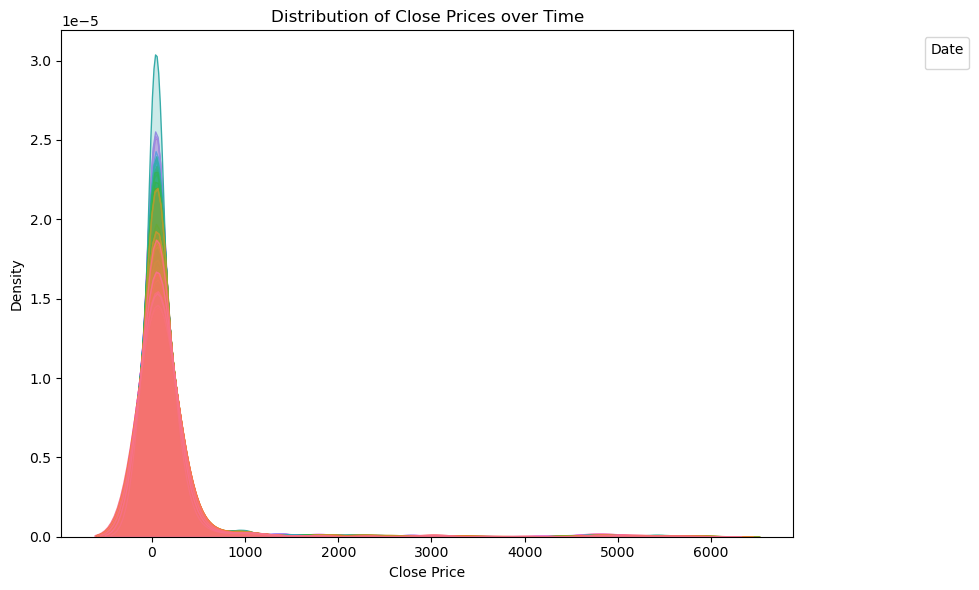

In [6]:
# Create KDE plot for the 'Close' prices over time
plt.figure(figsize=(10, 6))
sns.kdeplot(data=stock_data, x='Close', hue='Date', fill=True)

# Adding labels and title
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.title('Distribution of Close Prices over Time')

# Show plot
plt.legend(title='Date', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()


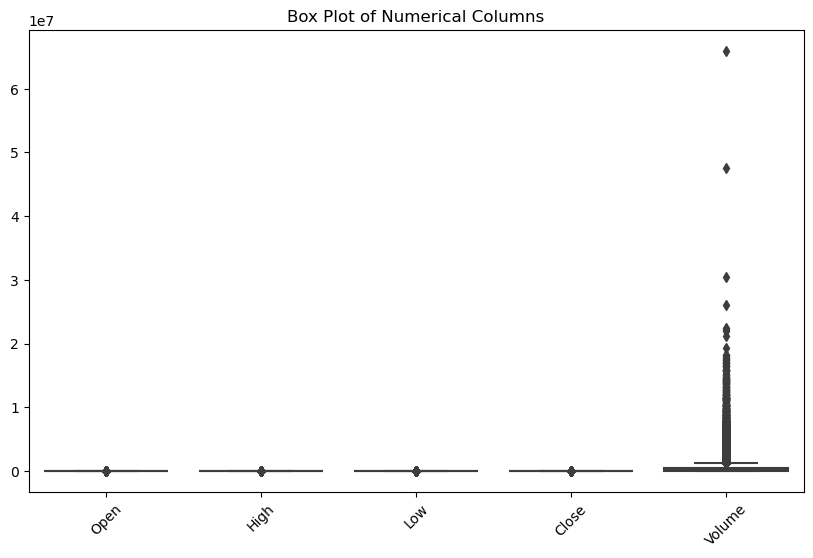

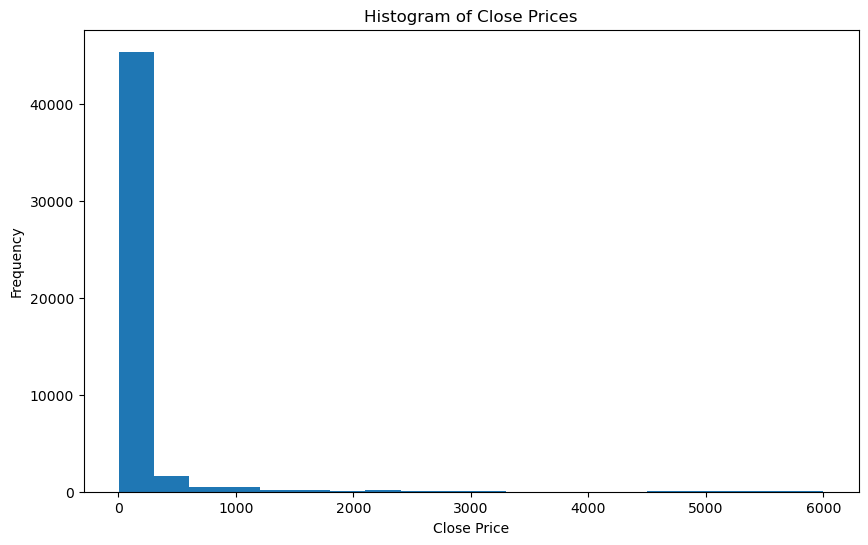

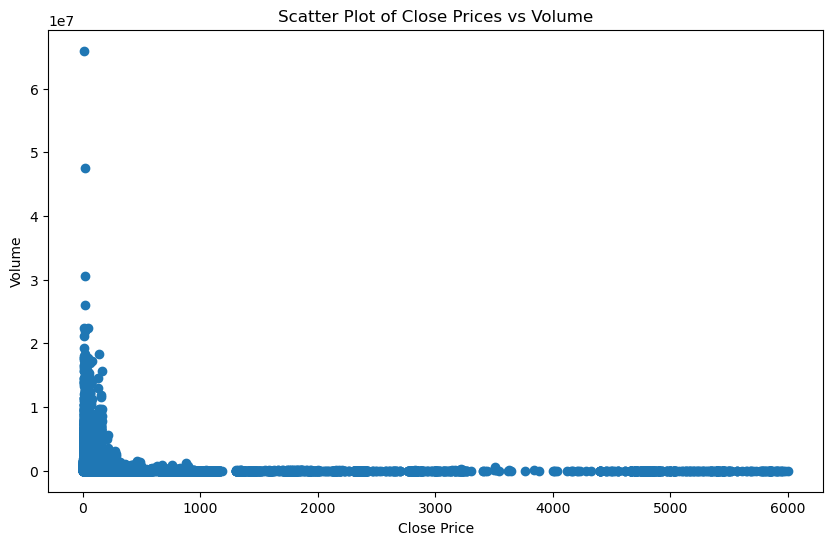

Outliers:
             Date        Name     Open     High      Low    Close  Volume
462    02-01-2022     20.Bond  3634.00  3634.00  3609.00  3617.83   12.00
463    03-01-2022     20.Bond  4033.88  4040.13  4033.75  4034.50    4.75
464    04-01-2022     20.Bond  2979.50  2980.00  2930.00  2971.75   58.50
465    05-01-2022     20.Bond  3988.25  4013.25  3988.25  3998.88   64.25
466    06-01-2022     20.Bond  4169.00  4213.00  4167.00  4175.10    8.40
...           ...         ...      ...      ...      ...      ...     ...
48713  26-06-2022  UNILEVERCL  2810.10  2846.00  2810.10  2836.50  119.00
48714  27-06-2022  UNILEVERCL  2821.00  2845.00  2821.00  2832.20  217.00
48715  28-06-2022  UNILEVERCL  2840.00  2848.00  2840.00  2847.10  460.00
48716  29-06-2022  UNILEVERCL  2826.00  2855.00  2826.00  2839.00   68.00
48717  30-06-2022  UNILEVERCL  2850.00  2880.00  2828.00  2855.70  239.00

[941 rows x 7 columns]


In [10]:
# Calculate summary statistics
summary_statistics = stock_data.describe()

# Box plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=stock_data)
plt.title('Box Plot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

# Histogram of 'Close' prices
plt.figure(figsize=(10, 6))
plt.hist(stock_data['Close'], bins=20)
plt.title('Histogram of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of 'Close' prices vs 'Volume'
plt.figure(figsize=(10, 6))
plt.scatter(stock_data['Close'], stock_data['Volume'])
plt.title('Scatter Plot of Close Prices vs Volume')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.show()

# Calculate Z-score for 'Close' prices
z_scores = (stock_data['Close'] - stock_data['Close'].mean()) / stock_data['Close'].std()

# Identify outliers with Z-score greater than 3 or less than -3
outliers = stock_data[abs(z_scores) > 3]

# Print outliers
print("Outliers:")
print(outliers)


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Sort DataFrame by 'Date' column
stock_data.sort_values(by='Date', inplace=True)

# Create line plot for 'Close' prices over time
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['Close'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


ValueError: time data "13-01-2022" doesn't match format "%m-%d-%Y", at position 9. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

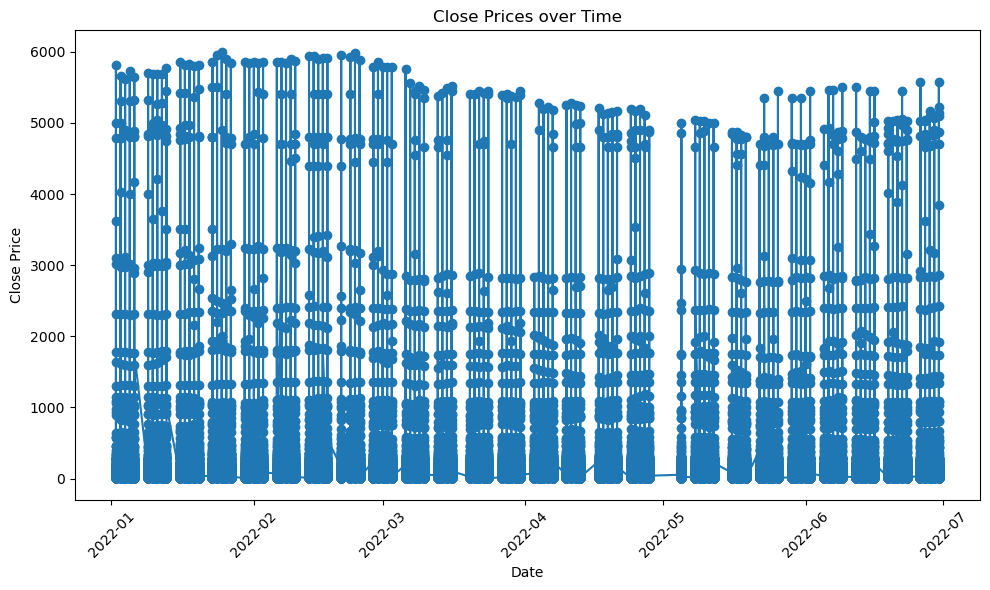

In [13]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime with the correct format
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%d-%m-%Y')

# Sort DataFrame by 'Date' column
stock_data.sort_values(by='Date', inplace=True)

# Create line plot for 'Close' prices over time
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['Close'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


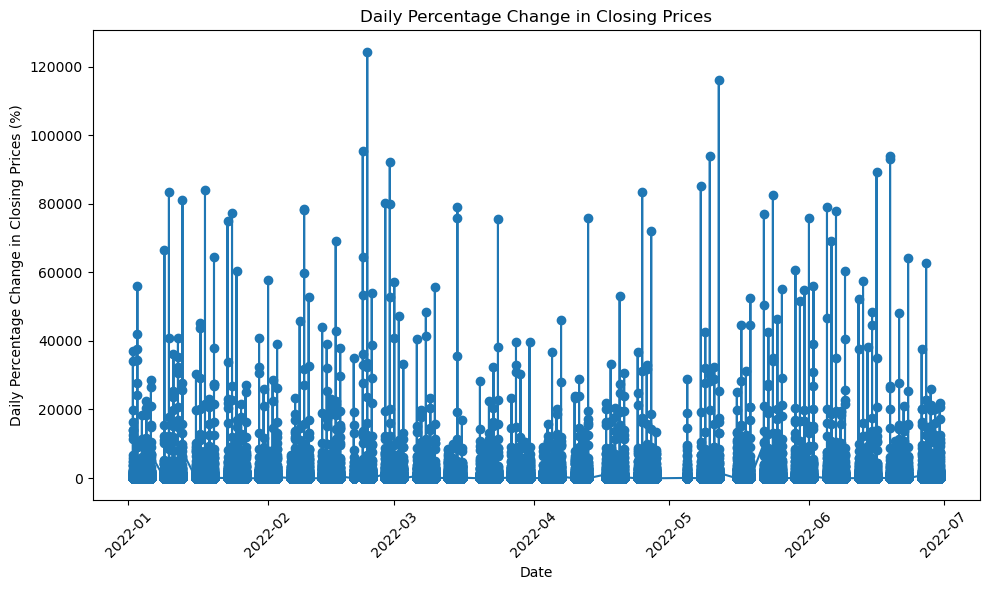

In [14]:
import matplotlib.pyplot as plt

# Calculate daily percentage change in closing prices
stock_data['Daily_Pct_Change'] = stock_data['Close'].pct_change() * 100

# Plot the daily percentage change
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['Daily_Pct_Change'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Daily Percentage Change in Closing Prices (%)')
plt.title('Daily Percentage Change in Closing Prices')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


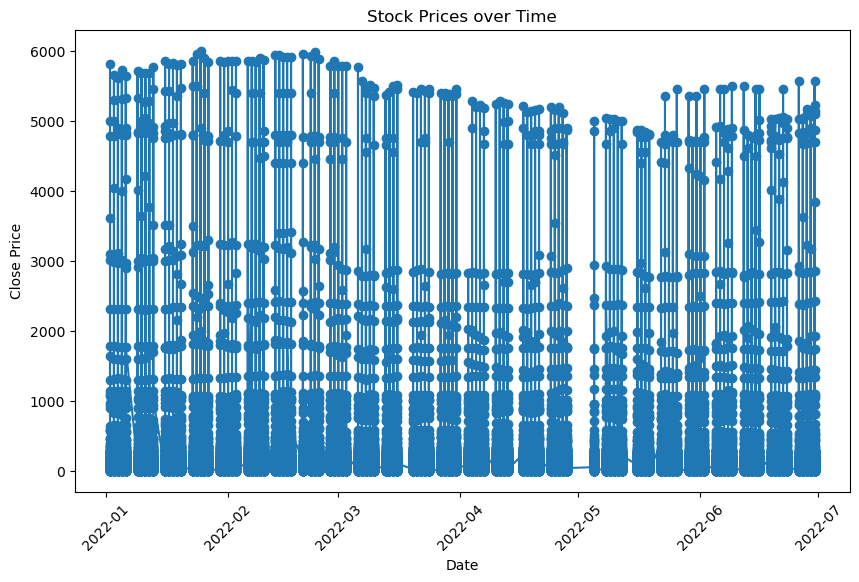

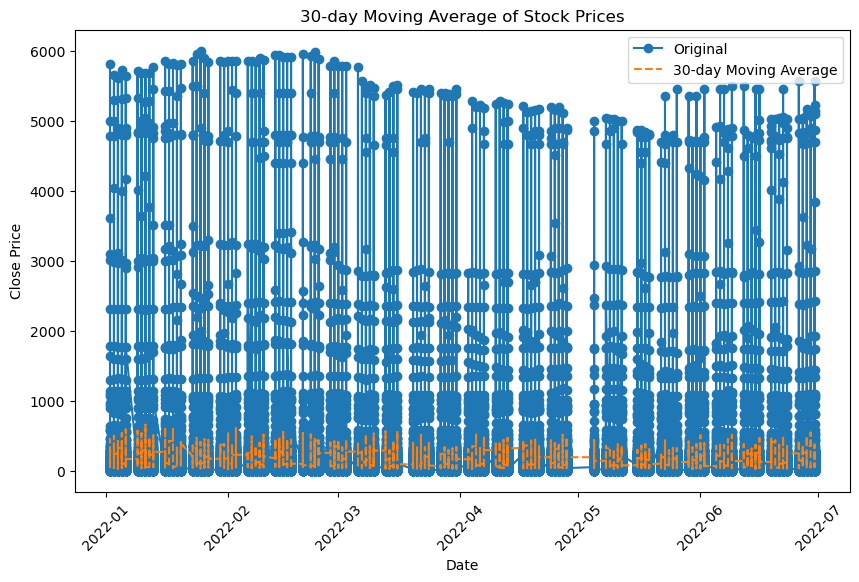

<Figure size 1000x800 with 0 Axes>

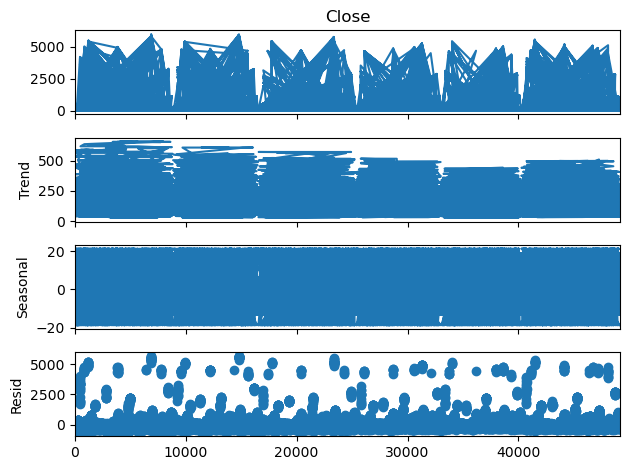

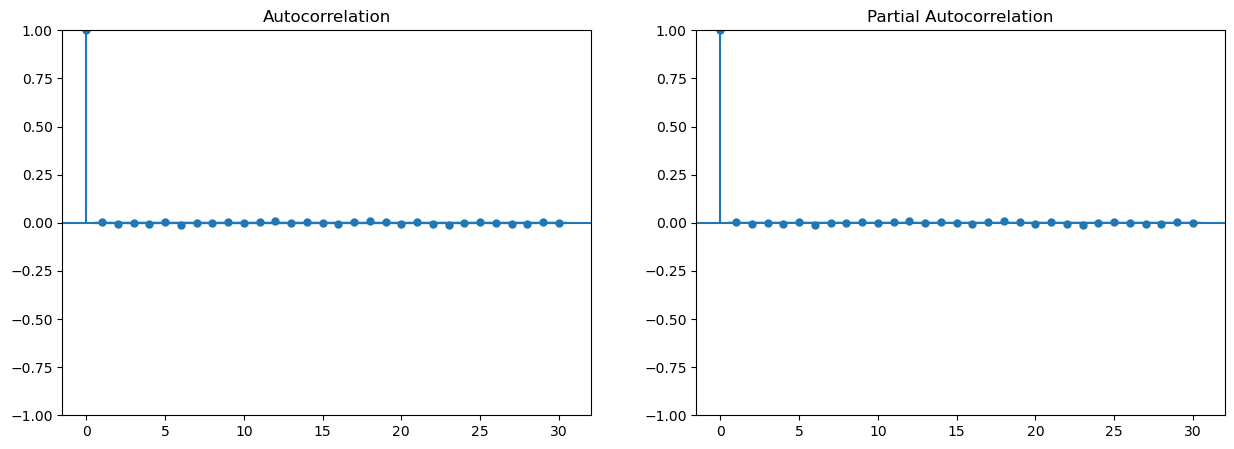

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Visual inspection: Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['Close'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Prices over Time')
plt.xticks(rotation=45)
plt.show()

# Moving Average: Calculate and plot the 30-day moving average
stock_data['30_day_MA'] = stock_data['Close'].rolling(window=30).mean()
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Original', marker='o', linestyle='-')
plt.plot(stock_data['Date'], stock_data['30_day_MA'], label='30-day Moving Average', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('30-day Moving Average of Stock Prices')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Seasonal Decomposition: Decompose the time series data
result = seasonal_decompose(stock_data['Close'], model='additive', period=30)
plt.figure(figsize=(10, 8))
result.plot()
plt.show()

# Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(stock_data['Close'], ax=axes[0], lags=30)
plot_pacf(stock_data['Close'], ax=axes[1], lags=30)
plt.show()


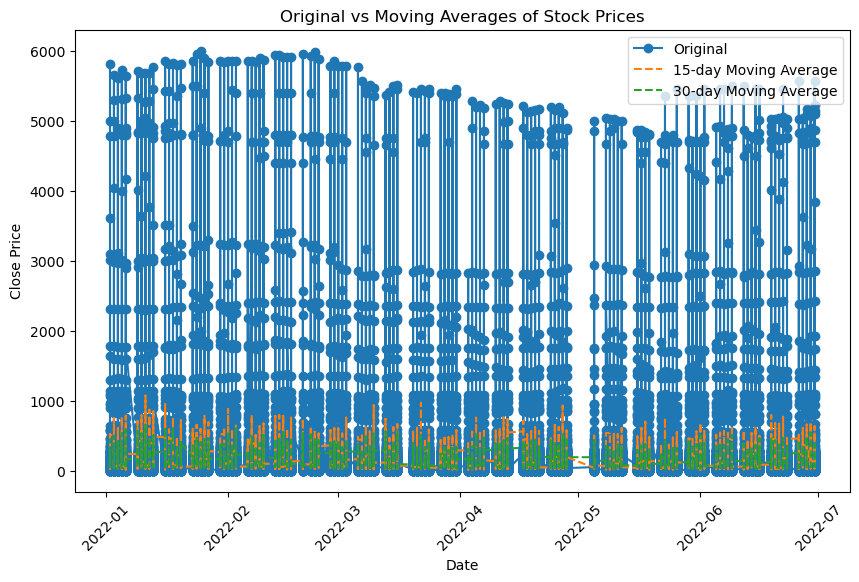

In [16]:
import matplotlib.pyplot as plt

# Calculate moving averages with window sizes of 15 days and 30 days
stock_data['15_day_MA'] = stock_data['Close'].rolling(window=15).mean()
stock_data['30_day_MA'] = stock_data['Close'].rolling(window=30).mean()

# Plot the original time series data and moving averages
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Original', marker='o', linestyle='-')
plt.plot(stock_data['Date'], stock_data['15_day_MA'], label='15-day Moving Average', linestyle='--')
plt.plot(stock_data['Date'], stock_data['30_day_MA'], label='30-day Moving Average', linestyle='--')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Original vs Moving Averages of Stock Prices')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [17]:
# Calculate the average closing price for each stock
average_close_price = stock_data.groupby('Name')['Close'].mean()

# Display the average closing price for each stock
print("Average Closing Price for Each Stock:")
print(average_close_price)


Average Closing Price for Each Stock:
Name
01.Bank                       21.260902
02.Cement                     96.600820
03.Ceramics_Sector            71.225164
04.Engineering               132.352459
05.Financial_Institutions     29.253525
                                ...    
WMSHIPYARD                    12.370492
YPL                           21.339344
ZAHEENSPIN                     9.964754
ZAHINTEX                       7.858197
ZEALBANGLA                   150.338525
Name: Close, Length: 412, dtype: float64


In [18]:
# Calculate the average closing price for each stock
average_close_price = stock_data.groupby('Name')['Close'].mean()

# Sort the average closing prices in ascending order
average_close_price_sorted = average_close_price.sort_values()

# Identify the top 5 and bottom 5 stocks based on average closing price
top_5_stocks = average_close_price_sorted.tail(5)  # Top 5 stocks
bottom_5_stocks = average_close_price_sorted.head(5)  # Bottom 5 stocks

# Display the top 5 and bottom 5 stocks
print("Top 5 Stocks based on Average Closing Price:")
print(top_5_stocks)
print("\nBottom 5 Stocks based on Average Closing Price:")
print(bottom_5_stocks)


Top 5 Stocks based on Average Closing Price:
Name
PBLPBOND      4836.195652
IBBL2PBOND    4851.330357
PREBPBOND     4918.357143
RECKITTBEN    5342.024793
APSCLBOND     5413.238636
Name: Close, dtype: float64

Bottom 5 Stocks based on Average Closing Price:
Name
FAMILYTEX     4.698361
ICBIBANK      4.725620
FBFIF         5.289344
POPULAR1MF    5.368033
PHPMF1        5.417213
Name: Close, dtype: float64


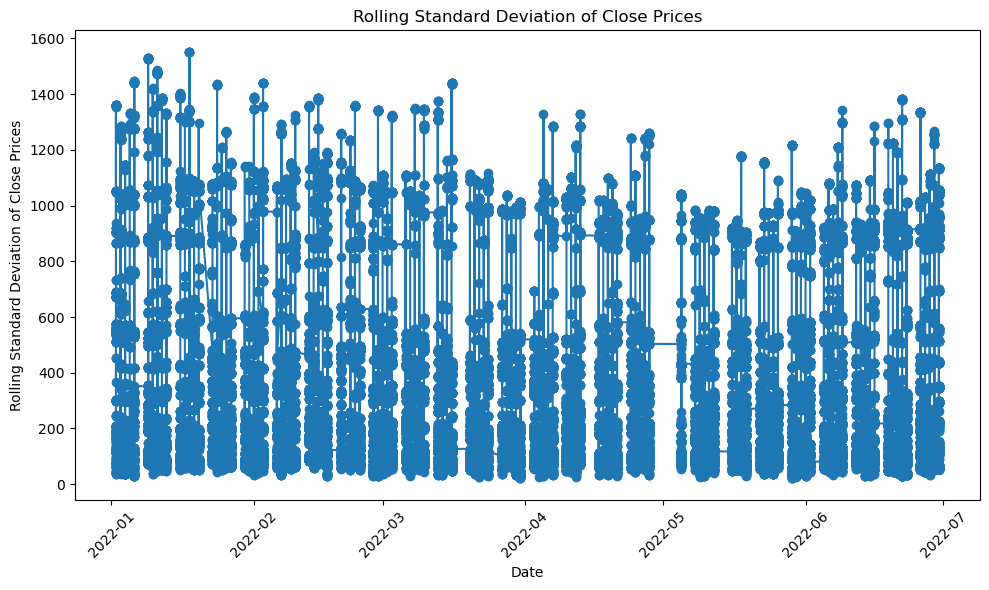

In [19]:
import matplotlib.pyplot as plt

# Calculate the rolling standard deviation of the 'Close' prices with a window size of 30 days
rolling_std = stock_data['Close'].rolling(window=30).std()

# Plot the rolling standard deviation
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], rolling_std, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation of Close Prices')
plt.title('Rolling Standard Deviation of Close Prices')
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


In [20]:
# Create a new column for daily price change
stock_data['Daily_Price_Change'] = stock_data['Close'] - stock_data['Open']

# Display the DataFrame with the new column
print(stock_data.head())


           Date                  Name    Open    High     Low   Close  \
0    2022-01-02               01.Bank   22.83   23.20   22.59   22.93   
3146 2022-01-02            FAREASTFIN    6.00    6.00    5.90    6.00   
4390 2022-01-02                ISNLTD   41.00   43.70   41.00   42.40   
6212 2022-01-02             PHENIXINS   60.90   60.90   58.70   60.20   
352  2022-01-02  17.Telecommunication  198.13  199.43  195.87  197.77   

          Volume  Daily_Pct_Change  30_day_MA  15_day_MA  Daily_Price_Change  
0     1842350.41               NaN        NaN        NaN                0.10  
3146   131207.00        -73.833406        NaN        NaN                0.00  
4390   101214.00        606.666667        NaN        NaN                1.40  
6212    37072.00         41.981132        NaN        NaN               -0.70  
352    502226.00        228.521595        NaN        NaN               -0.36  


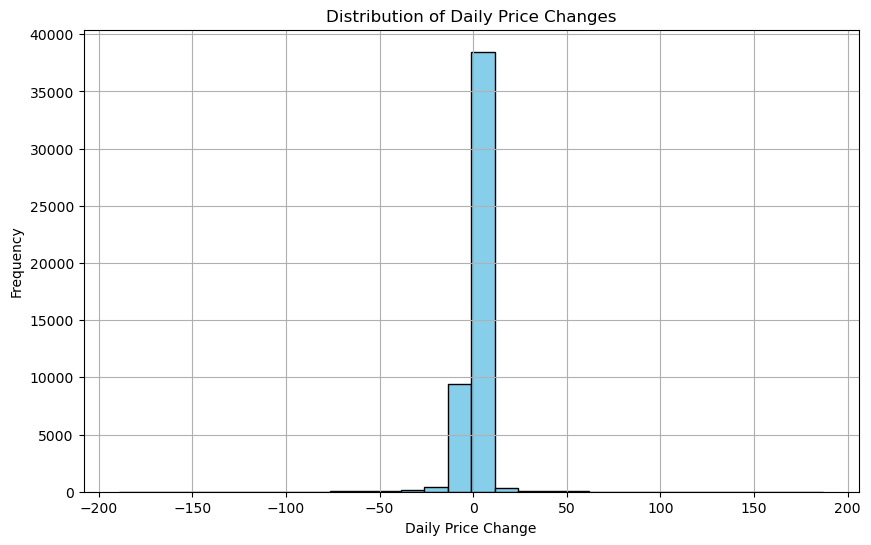

In [21]:
import matplotlib.pyplot as plt

# Plot a histogram of daily price changes
plt.figure(figsize=(10, 6))
plt.hist(stock_data['Daily_Price_Change'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Daily Price Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Price Changes')
plt.grid(True)
plt.show()


In [22]:
# Identify days with the largest price increases
largest_increase_days = stock_data.nlargest(5, 'Daily_Price_Change')

# Identify days with the largest price decreases
largest_decrease_days = stock_data.nsmallest(5, 'Daily_Price_Change')

# Display the results
print("Days with the Largest Price Increases:")
print(largest_increase_days[['Date', 'Daily_Price_Change']])
print("\nDays with the Largest Price Decreases:")
print(largest_decrease_days[['Date', 'Daily_Price_Change']])


Days with the Largest Price Increases:
            Date  Daily_Price_Change
48081 2022-06-29               187.0
46684 2022-06-27               145.5
46681 2022-06-21               141.5
6878  2022-01-05               125.6
44145 2022-06-30               124.5

Days with the Largest Price Decreases:
            Date  Daily_Price_Change
23365 2022-03-07              -189.2
2774  2022-01-03              -182.5
31312 2022-04-28              -178.7
2786  2022-01-20              -166.6
6896  2022-01-31              -154.9


In [23]:
import numpy as np

# Define a function to calculate z-score
def calculate_z_score(volume):
    mean_volume = volume.mean()
    std_volume = volume.std()
    return (volume - mean_volume) / std_volume

# Calculate z-score of trading volume for each stock on each day
stock_data['Volume_Z_Score'] = stock_data.groupby('Name')['Volume'].transform(calculate_z_score)

# Define a threshold for identifying unusually high trading volume
z_score_threshold = 2  # Adjust as needed

# Identify stocks with unusually high trading volume
unusually_high_volume_stocks = stock_data[stock_data['Volume_Z_Score'] > z_score_threshold]

# Display the results
print("Stocks with Unusually High Trading Volume:")
print(unusually_high_volume_stocks[['Date', 'Name', 'Volume', 'Volume_Z_Score']])


Stocks with Unusually High Trading Volume:
            Date        Name      Volume  Volume_Z_Score
7447  2022-01-02    SBACBANK   1278728.0        2.131782
5949  2022-01-02  ONEBANKLTD  14308455.0        2.849314
3717  2022-01-02  GSPFINANCE  10140706.0        2.495117
6677  2022-01-02  PUBALIBANK    321079.0        2.515429
7095  2022-01-02   RSRMSTEEL    678912.0        3.450802
...          ...         ...         ...             ...
45842 2022-06-30   NAVANACNG    556930.0        9.387222
41037 2022-06-30   AFTABAUTO    442877.0        6.362471
45381 2022-06-30   MEGHNAINS    224940.0        3.740606
46884 2022-06-30    PRIMETEX   1585526.0        2.338478
46972 2022-06-30  PUBALIBANK    362412.0        2.994540

[2326 rows x 4 columns]


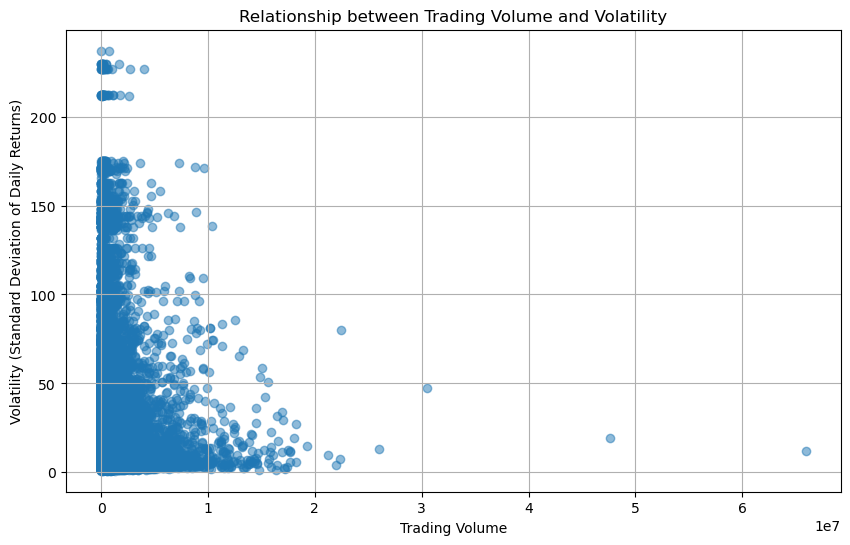

In [24]:
# Calculate daily returns
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

# Calculate the standard deviation of daily returns as a measure of volatility
stock_data['Volatility'] = stock_data['Daily_Return'].rolling(window=30).std()

# Plot trading volume against volatility
plt.figure(figsize=(10, 6))
plt.scatter(stock_data['Volume'], stock_data['Volatility'], alpha=0.5)
plt.xlabel('Trading Volume')
plt.ylabel('Volatility (Standard Deviation of Daily Returns)')
plt.title('Relationship between Trading Volume and Volatility')
plt.grid(True)
plt.show()


In [25]:
# Select the relevant columns for correlation calculation
price_data = stock_data[['Open', 'High', 'Low', 'Close']]

# Calculate the correlation matrix
correlation_matrix = price_data.corr()

# Display the correlation matrix
print("Correlation Matrix between 'Open' & 'High', 'Low' & 'Close' prices:")
print(correlation_matrix)


Correlation Matrix between 'Open' & 'High', 'Low' & 'Close' prices:
           Open      High       Low     Close
Open   1.000000  0.999940  0.999939  0.999925
High   0.999940  1.000000  0.999887  0.999942
Low    0.999939  0.999887  1.000000  0.999961
Close  0.999925  0.999942  0.999961  1.000000


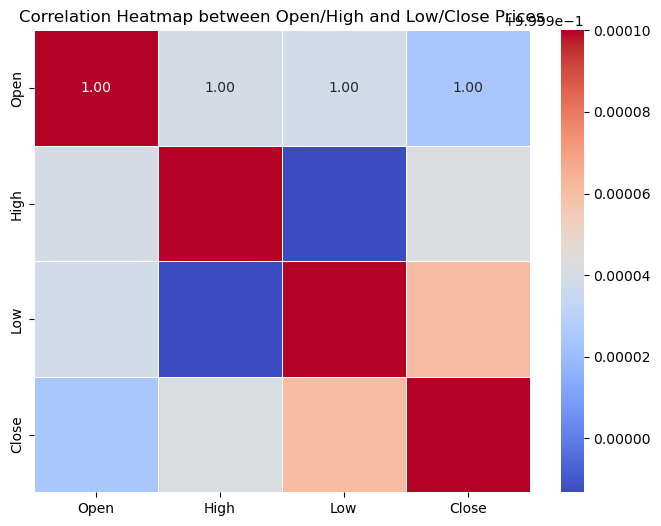

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for correlation calculation
price_data = stock_data[['Open', 'High', 'Low', 'Close']]

# Calculate the correlation matrix
correlation_matrix = price_data.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap between Open/High and Low/Close Prices')
plt.show()
